# Session 7
DecisionTree classifier on Loans data


## Import loans data.
Note that this is the same set we used to pracitce in JMP. For comparison purpose, we keep the same Validation column.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# prompt: import loans data from here /content/drive/MyDrive/Campus/Master Study/Courses/Fall 2024/DSO-528 Blended Data Business Analytics for Efficient Decisions/In-Class Practice/Session 7/loans_clean.txt

import pandas as pd

loans = pd.read_csv('/content/drive/MyDrive/Campus/Master Study/Courses/Fall 2024/DSO-528 Blended Data Business Analytics for Efficient Decisions/In-Class Practice/Session 7/loans_clean.txt', delimiter='\t')


In [5]:
loans.head()

,default,credit.policy,installment,log.annual.inc,fico,inq.last.6mths,revol.bal,Validation
0,0,1,228.22,11.082143,707,0,33623,1
1,0,1,366.86,10.373491,682,1,3511,1
2,0,1,84.12,10.203592,707,1,5630,1
3,0,1,253.58,11.835009,662,2,5122,1
4,0,1,188.02,11.225243,772,1,29797,1


## Set up test and train data.
Test is the set of data with Validation value of 1.

In [6]:
# prompt: in the loans data, set test data as those with Validation value 1, and the rest as train data

train = loans[loans['Validation'] != 1]
test = loans[loans['Validation'] == 1]
train.shape, test.shape

((6705, 8), (2873, 8))

## Build a tree model.
The tree built in this sample sets depth as 4, and minimum size of leave as 5% of the training sample.

In [11]:
# prompt: build a decision tree on the train data of loans to predict default using all other variables as predictor, set tree depth at 3, min leaf sample size as 5% of the training data

from sklearn.tree import DecisionTreeClassifier

# Define the target variable and predictor variables
target = 'default'
predictors = [x for x in train.columns if x != target]

# Create a decision tree classifier with specified parameters
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=int(0.05 * len(train)))

# Fit the model to the training data
tree.fit(train[predictors], train[target])


DecisionTreeClassifier(max_depth=4, min_samples_leaf=335)

## Show variable contribution
Show how much each variable helps with the prediction. This can be thought of predicted power of each independent variable.

In [12]:
# prompt: show variable importance, list the importance with variable name, rank by importance

import pandas as pd
# Get feature importances
importances = tree.feature_importances_

# Create a DataFrame to store variable importance
feature_importances = pd.DataFrame({'Variable': predictors, 'Importance': importances})

# Sort by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Display the variable importance
print(feature_importances)


         Variable  Importance
0   credit.policy    0.588014
3            fico    0.234550
4  inq.last.6mths    0.056433
2  log.annual.inc    0.042777
5       revol.bal    0.039555
1     installment    0.038671
6      Validation    0.000000


## Plot the tree
This tree shows porportion of samples in each node.

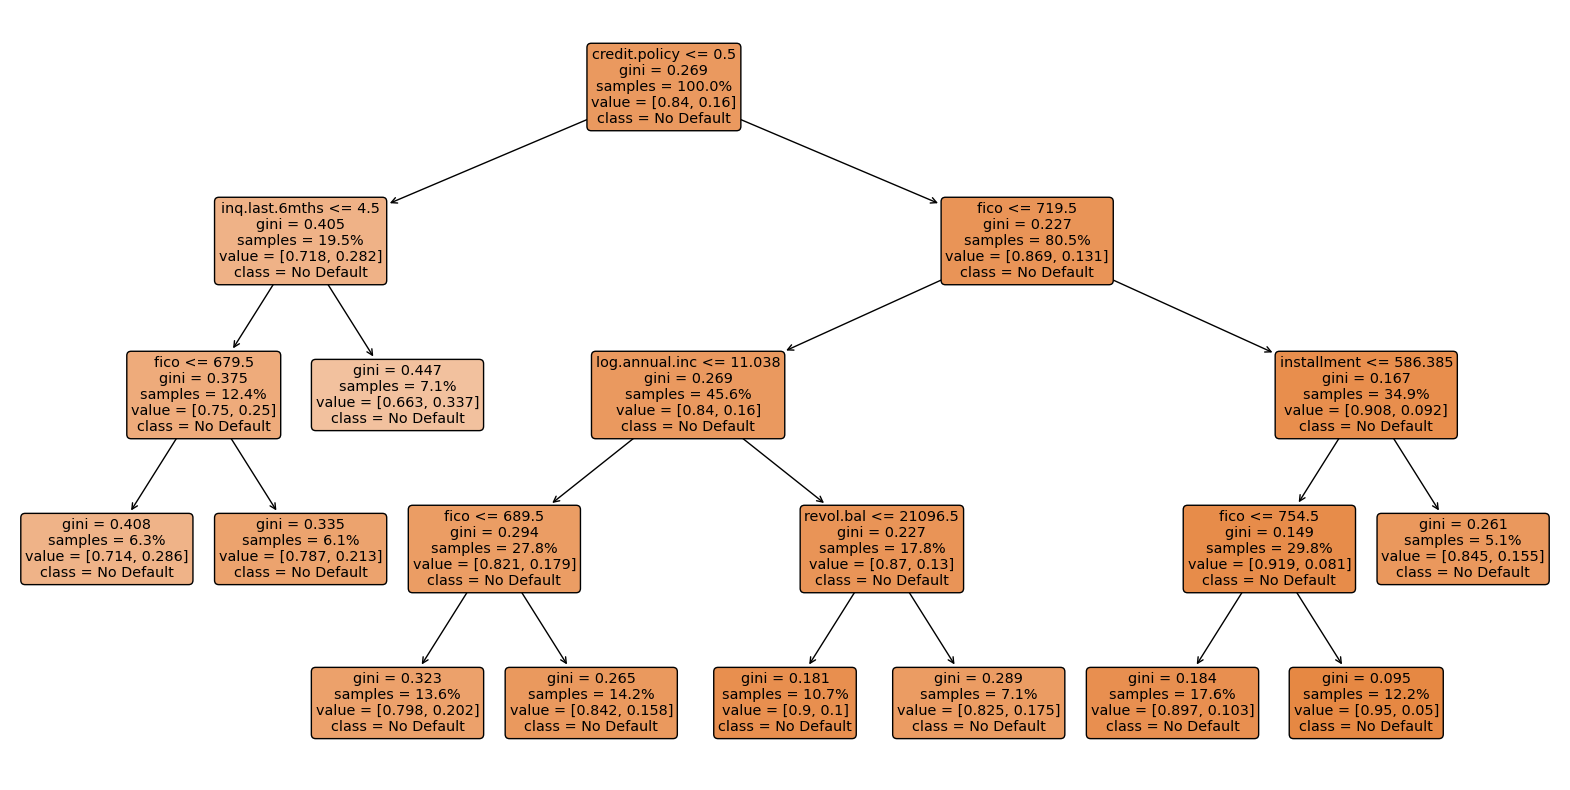

In [13]:
# prompt: plot the tree, show proportion of sample in each level,

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=predictors, class_names=['No Default', 'Default'], filled=True, proportion=True, rounded=True)
plt.show()


## Predict for test data
Use the tree model to predict the default probability for the test sample. Save the predicted to the data to a new file.

In [14]:
# prompt: predict default probability for the test data, save altogether as a csv file to /content/drive/MyDrive/Colab Notebooks/DSO528/Week4 folder with the name loans528_4

# Predict the probability of default for the test data
default_probabilities = tree.predict_proba(test[predictors])[:, 1]

# Create a new DataFrame with the test data and predicted probabilities
test_with_predictions = test.copy()
test_with_predictions['default_probability'] = default_probabilities

# Save the DataFrame to a CSV file
test_with_predictions.to_csv('/content/drive/MyDrive/Campus/Master Study/Courses/Fall 2024/DSO-528 Blended Data Business Analytics for Efficient Decisions/In-Class Practice/Session 7/loans528.csv', index=False)


In [17]:
test_with_predictions[['default', 'default_probability']].to_clipboard(index = False)

PyperclipException: 
    Pyperclip could not find a copy/paste mechanism for your system.
    For more information, please visit
    https://pyperclip.readthedocs.io/en/latest/#not-implemented-error
    